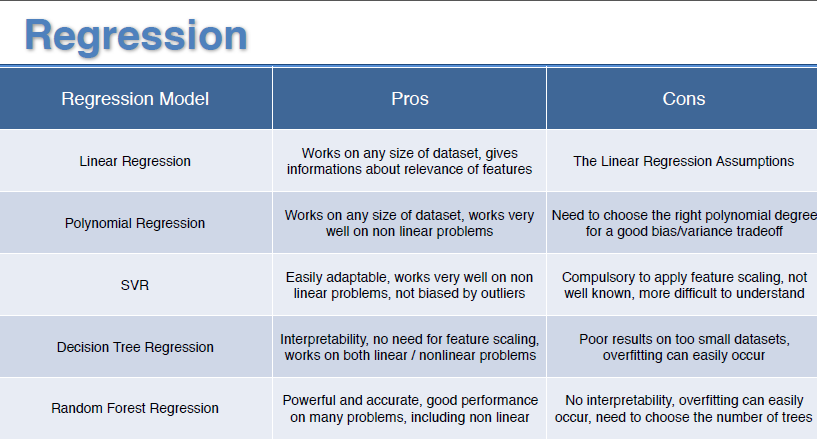

# Simple Linear Regression

### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import data
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/Salary_Data.csv')
X = dataset.iloc[:,:-1].values   #independent variables
y = dataset.iloc[:,-1].values    #Dependent variable

# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Training the SLR model on the Training set

In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Coefficient Values

In [4]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


Therefore, the equation of our simple linear regression model is:
$$\hat{y} = \hat{\beta_{1}} x + \hat\beta_{0}$$

$$\equiv $$

$$\textrm{Salary} = 9345.94 \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

### Predicting the Test set results

In [5]:
y_pred = regressor.predict(X_test)

Single Prediction (12 years of experience)

In [6]:
print(regressor.predict([[12]]))

[138531.00067138]


### Visualize results

Training

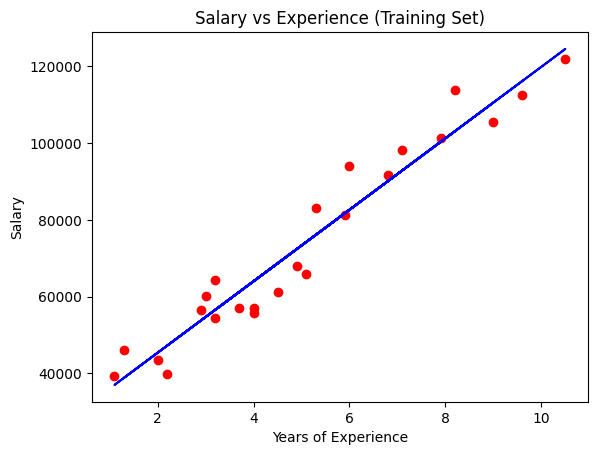

In [7]:
plt.scatter(X_train, y_train, color = 'red') #Scatter points
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #Regression line
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Test

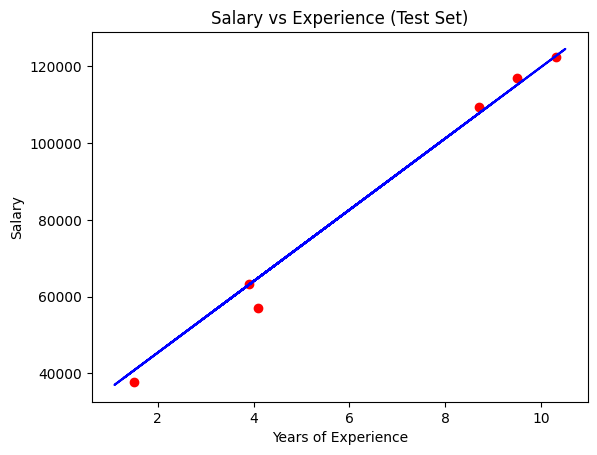

In [8]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression

### Data Preprocessing

Libraries

In [9]:
#Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Libraries for categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Library for splitting data into training and test set
from sklearn.model_selection import train_test_split


Data preparation

In [10]:
#Import dataset
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/50_Startups.csv')
X = dataset.iloc[:,:-1].values   #independent variables
y = dataset.iloc[:,-1].values    #Dependent variable
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
#Categorical data
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:] # Avoiding the Dummy Variable Trap

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

### Training the MLR model on the Training Set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

The class will avoid the dummy variable trap and select the most precise features for the model.

Coefficient values

In [13]:
print(regressor.coef_)
print(regressor.intercept_)

[-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]
42554.16761776614


### Predicting the Test Set results

In [14]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Single Prediction

In [15]:
print(regressor.predict([[ 1, 0, 160000, 130000, 300000]]))

[180607.64]


### Visualize results

Three possible graphs

Training Set

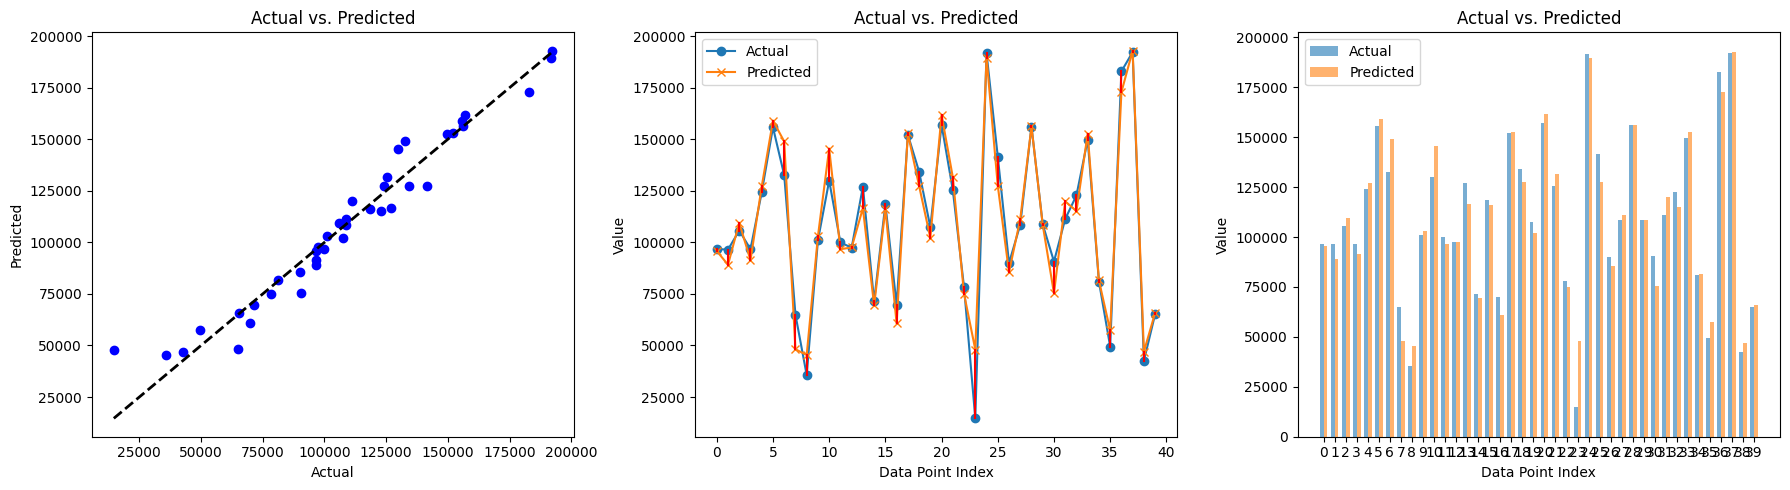

In [16]:
# Scatter Plot
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, regressor.predict(X_train), color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Line Plot
plt.subplot(1, 3, 2)
indexes = np.arange(len(y_train))
plt.plot(indexes, y_train, label='Actual', marker='o')
plt.plot(indexes,  regressor.predict(X_train), label='Predicted', marker='x')
for i in range(len(y_train)):
    plt.plot([i, i], [y_train[i],  regressor.predict(X_train)[i]], 'r-')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.legend()

# Bar Plot
plt.subplot(1, 3, 3)
bar_width = 0.35
indexes = np.arange(len(y_train))
plt.bar(indexes, y_train, bar_width, label='Actual', alpha=0.6)
plt.bar(indexes + bar_width,  regressor.predict(X_train), bar_width, label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.xticks(indexes + bar_width / 2, indexes)
plt.legend()

plt.tight_layout()
plt.show()

Test Set

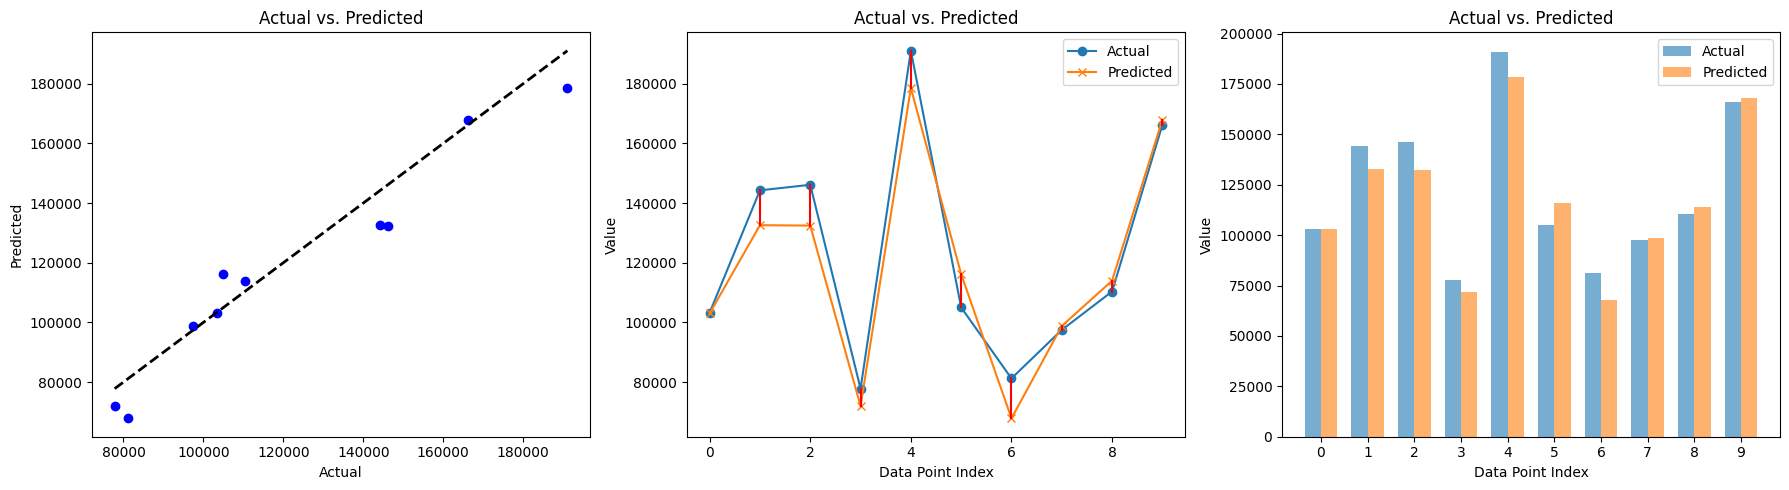

In [17]:
# Scatter Plot
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Line Plot
plt.subplot(1, 3, 2)
indexes = np.arange(len(y_test))
plt.plot(indexes, y_test, label='Actual', marker='o')
plt.plot(indexes, y_pred, label='Predicted', marker='x')
for i in range(len(y_test)):
    plt.plot([i, i], [y_test[i], y_pred[i]], 'r-')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.legend()

# Bar Plot
plt.subplot(1, 3, 3)
bar_width = 0.35
indexes = np.arange(len(y_test))
plt.bar(indexes, y_test, bar_width, label='Actual', alpha=0.6)
plt.bar(indexes + bar_width, y_pred, bar_width, label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.xticks(indexes + bar_width / 2, indexes)
plt.legend()

plt.tight_layout()
plt.show()

# Polynomial Linear Regression

### Data Preprocessing

In [18]:
#Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#Import dataset
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values   #independent variables
y = dataset.iloc[:,-1].values    #Dependent variable
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Training the SLR on the whole dataset

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

### Training the PLR on the whole dataset

In [21]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

### Visualising the SLR results

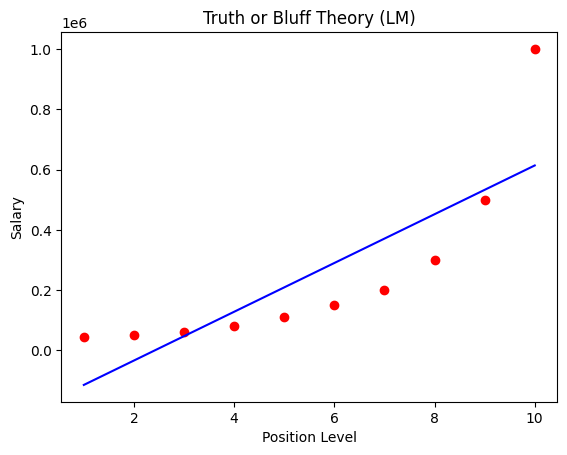

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff Theory (LM)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the PLR results

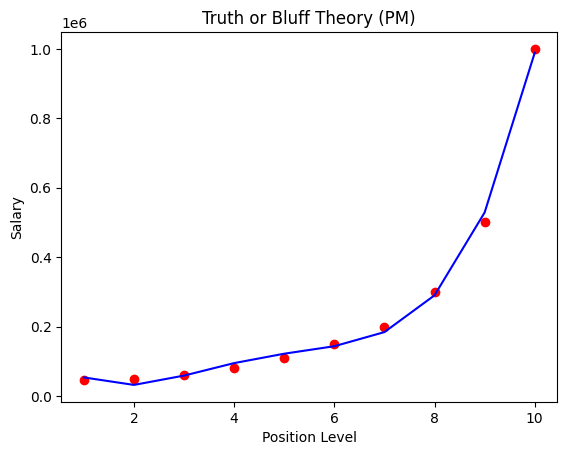

In [23]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff Theory (PM)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Smother curve and higher resolution

C:\Users\Sebas\AppData\Local\Temp\ipykernel_21292\1381382625.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X),max(X),0.1)


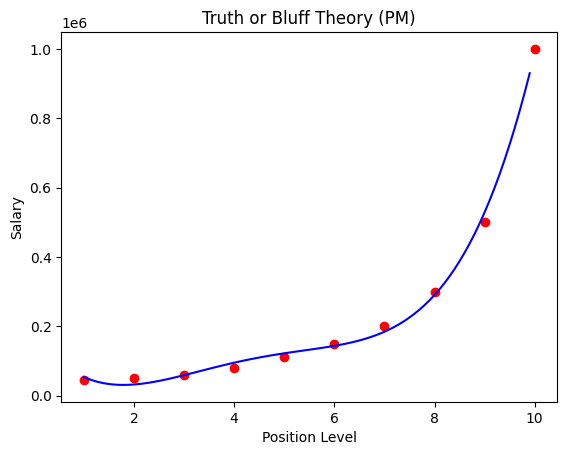

In [24]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff Theory (PM)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Predicting a new result with SLR

In [25]:
lin_reg.predict([[6.5]])

array([330378.79])

Bad prediction

### Predicting a new result with PLR

In [26]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

Better

# Support Vector Regression

## Data Preprocessing

### Libraries

In [27]:
# Essentials
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Scaling
from sklearn.preprocessing import StandardScaler

### Dataset

In [28]:
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values   #independent variables
y = dataset.iloc[:,-1].values    #Dependent variable
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


We do not split the data because it's too short, and we want to leverage the maximum data.

### Feature Scaling

In [29]:
y = y.reshape(len(y), 1)
print(y), print(X)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


(None, None)

In [30]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [31]:
print(y), print(X)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]
[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


(None, None)

### Training the SVR on the whole dataset

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\Users\Sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new result

In [33]:

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.02]])

### Visualizing thw SVR results

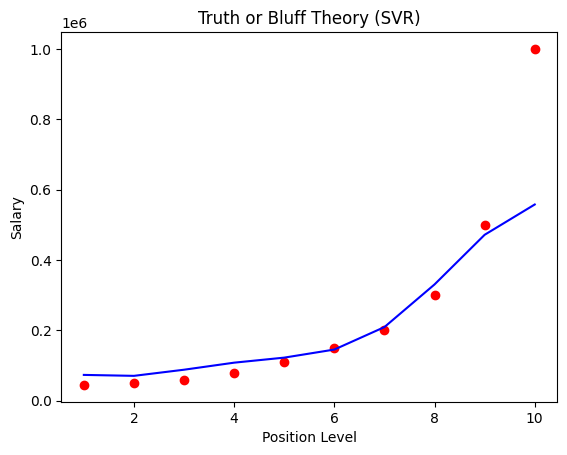

In [34]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff Theory (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualizing the SVR results (for higher resolution and smoother curve)

C:\Users\Sebas\AppData\Local\Temp\ipykernel_21292\1864138237.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)


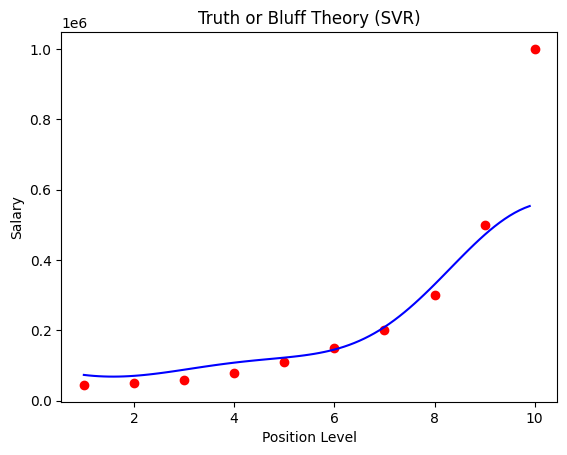

In [35]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff Theory (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Decision Tree Regression

## Data Preprocessing

### Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset

In [37]:
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values   #independent variables
y = dataset.iloc[:,-1].values    #Dependent variable

### Training the DTR model on the whole dataset

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

### Predicting a new result

In [39]:
regressor.predict([[6.5]])

array([150000.])

### Visualizing (high resolution)

C:\Users\Sebas\AppData\Local\Temp\ipykernel_21292\1618298621.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)  # Higher resolution grid


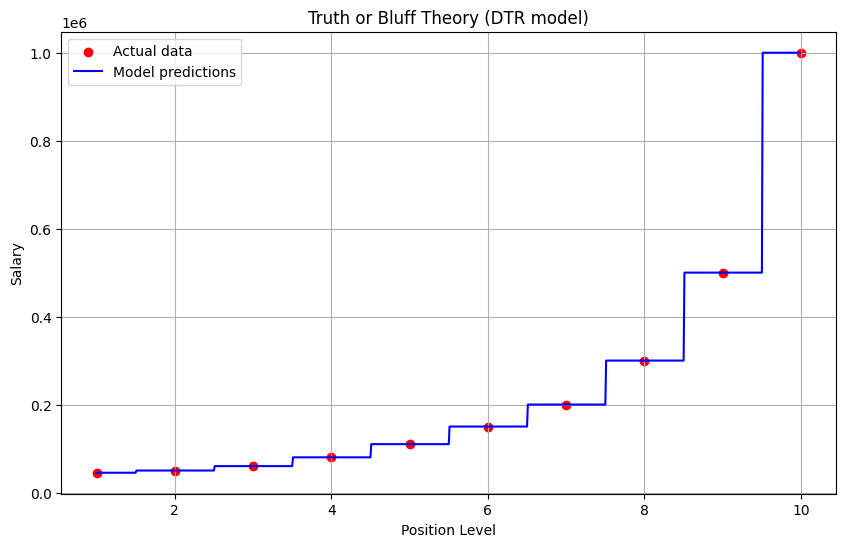

In [40]:
# Create a high-resolution grid for better visualization
X_grid = np.arange(min(X), max(X), 0.01)  # Higher resolution grid
X_grid = X_grid.reshape((len(X_grid), 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='Model predictions')
plt.title('Truth or Bluff Theory (DTR model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

As we can see, DTR is not the best model when we have a single feature. It is best suitable for multiple features. This model suffers from Overfitting

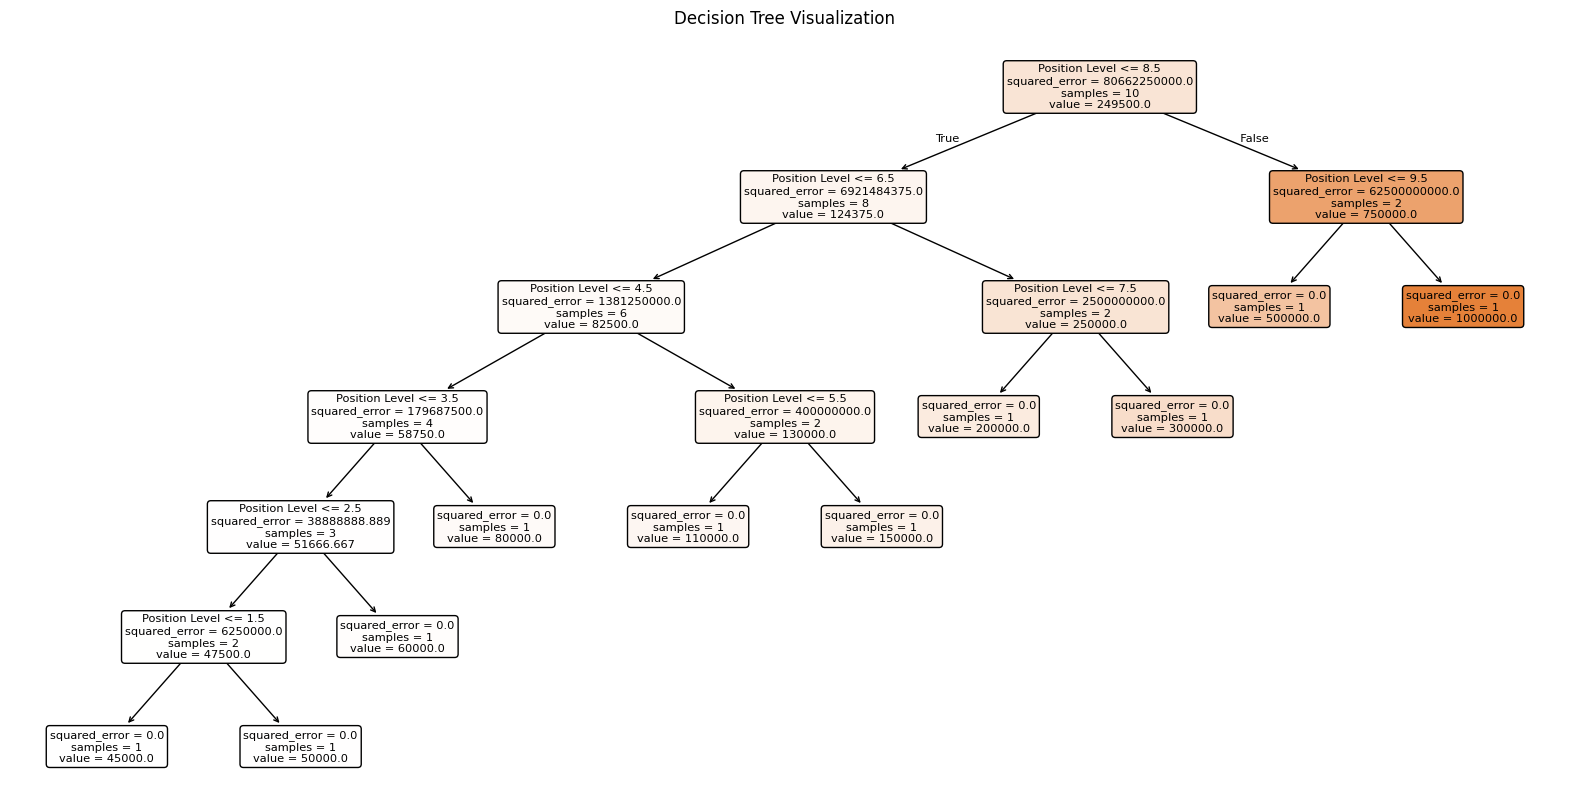

In [41]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=['Position Level'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Random Forest Regression

Esemble Learning is when we take multiple algorithms (or the same one multiple times) and put them together to make something much more powerfull.

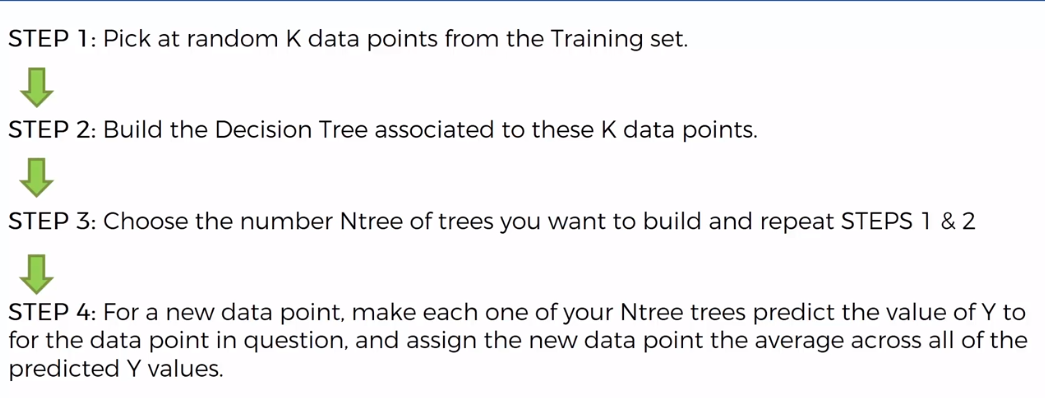

## Data Preprocessing

### Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset

In [43]:
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values   #independent variables
y = dataset.iloc[:,-1].values    #Dependent variable

### Training the RFR model on the whole dataset

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting a new result

In [45]:
regressor.predict([[6.5]])

array([167000.])

### Visualizing (high resolution)

C:\Users\Sebas\AppData\Local\Temp\ipykernel_21292\3313163414.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X),max(X),0.1)


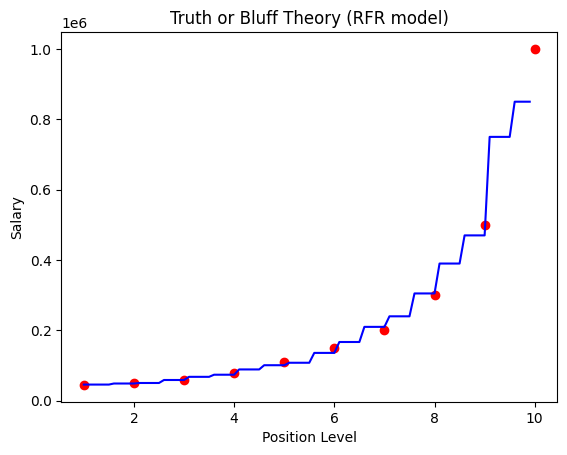

In [46]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff Theory (RFR model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

More steps than last time because we have more trees

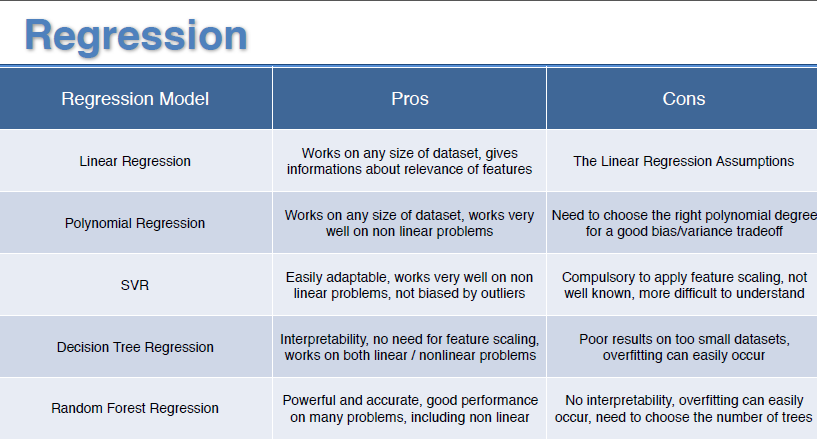